# An introductional notebook to HEP analysis in C++

<p>In this notebook you can find an easy set of commands that show some basic computing techniques commonly used in High Energy Physics (HEP) analyzes.</p>

<p>It also shows how to create an histogram, fill it and draw it. Moreover it is an introduction to [ROOT](https://root.cern.ch/) too. The final output is a plot with the number of leptons.</p>

Based on ATLAS opendata notebooks (http://opendata.atlas.cern/release/2020/documentation/notebooks/intro.html)


The library used is [ROOT](https://root.cern.ch/), a scientific data analysis software framework that provides a large set of functionalities needed to deal with big data processing, statistical analysis, visualisation and storage.

<p>At first we have to include several helpers that will support our analysis:</p>

In [1]:
#include <iostream>
#include <string>
#include <stdio.h>

Next we have to open the data that we want to analyze. As described above the data is stored in a _*.root_ file. This is a root file containing tracks and calorimeter clusters

In [2]:
//TFile *file = TFile::Open("Data_8TeV.root"); 
TFile *MCfile = TFile::Open("ttbar_8TeV.root"); 

The next step is to define a tree named _tree_ to get the data out of the _*.root_ file. The tree in this root file is called "mini". We will then print the contents of the tree to find the names of the variables. 

In [3]:
TTree *MCtree = (TTree*) MCfile->Get("mini");
MCtree->Print()

******************************************************************************
*Tree    :mini      : 4-vectors + variables required for scaling factors     *
*Entries :  1500000 : Total =       567791759 bytes  File  Size =  300057248 *
*        :          : Tree compression factor =   1.89                       *
******************************************************************************
*Br    0 :runNumber : runNumber/I                                            *
*Entries :  1500000 : Total  Size=    6002049 bytes  File Size  =      31136 *
*Baskets :       18 : Basket Size=     790016 bytes  Compression= 192.75     *
*............................................................................*
*Br    1 :eventNumber : eventNumber/I                                        *
*Entries :  1500000 : Total  Size=    6002093 bytes  File Size  =    3819950 *
*Baskets :       18 : Basket Size=     790016 bytes  Compression=   1.57     *
*...................................................

In [ ]:
TTree *tree = (TTree*) file->Get("mini");
tree->Print()

Activate variables 

In [4]:

Bool_t e_trig;
Bool_t mu_trig;
Bool_t good_vtx;
UInt_t lep_n;
UInt_t jet_n;
Float_t MET;
Float_t MET_phi;
Float_t mcw;

Float_t lep_pt[10];  
Float_t lep_eta[10];  
Float_t lep_phi[10];  
Float_t lep_E[10];  
Int_t lep_type[10];  
Float_t lep_ptcone30[10];
Float_t lep_etcone20[10];

Float_t jet_pt[10];  
Float_t jet_eta[10];  
Float_t jet_jvf[10];  
Float_t jet_mv1[10];  


MCtree->SetBranchAddress("mcWeight", &mcw);
MCtree->SetBranchAddress("trigE", &e_trig);
MCtree->SetBranchAddress("trigM", &mu_trig);
MCtree->SetBranchAddress("hasGoodVertex", &good_vtx);
MCtree->SetBranchAddress("lep_n", &lep_n);
MCtree->SetBranchAddress("jet_n", &jet_n);
MCtree->SetBranchAddress("met_et", &MET);
MCtree->SetBranchAddress("met_phi", &MET_phi);

MCtree->SetBranchAddress("lep_pt", &lep_pt);
MCtree->SetBranchAddress("lep_eta", &lep_eta);
MCtree->SetBranchAddress("lep_phi", &lep_phi);
MCtree->SetBranchAddress("lep_E", &lep_E);
MCtree->SetBranchAddress("lep_type", &lep_type);
MCtree->SetBranchAddress("lep_ptcone30", &lep_ptcone30);
MCtree->SetBranchAddress("lep_etcone20", &lep_etcone20);

MCtree->SetBranchAddress("jet_pt", &jet_pt);
MCtree->SetBranchAddress("jet_eta", &jet_eta);
MCtree->SetBranchAddress("jet_jvf", &jet_jvf);
MCtree->SetBranchAddress("jet_MV1", &jet_mv1);

In [5]:
TCanvas *canvas0 = new TCanvas("Canvas0","0",800,600);

Create histograms: Leading jet pT and all jets pT 

In [6]:
/*
TH1F *cutflow = new TH1F("Cutflow","Cutflow; Cut; Events",20,0,10);

TH1F *hist_lep_pt = new TH1F("Leptons pT","lep pT; pT(GeV); Events",100,0,200);
TH1F *hist_lep_eta = new TH1F("Leptons eta","lep eta; eta; Events",20,-5,5);
TH1F *hist_track_isol = new TH1F("Track Isolation","track Isol; pTcone/pT; Events",10,0,1);
TH1F *hist_cal_isol = new TH1F("Calorimeter Isolation","cal Isol; pTcone/pT; Events",10,0,1);


TH1F *hist_njets = new TH1F("Number of jets","n-jets; Jet multiplicity; Events",10,0,10);
TH1F *hist_jet_pt = new TH1F("Jets pT","jet pT; pT(GeV); Events",100,0,200);
TH1F *hist_jet_eta = new TH1F("Jets eta","jet eta; eta; Events",20,-5,5);
TH1F *hist_jet_jvf = new TH1F("Jets JVF","jet JVF; JVF; Events",20,-1,1);
TH1F *hist_jet_mv1 = new TH1F("Jets MV1","jet MV1; mv1; Events",20,0,1);
TH1F *hist_nbjets = new TH1F("Number of b jets","n-bjets; b Jet multiplicity; Events",10,0,10);

TH1F *hist_MET = new TH1F("Missing ET", "MET; Et, Events", 100, 0, 100);
TH1F *hist_MWT = new TH1F("W Mass", "MWT; Et, Events", 100, 0, 100);
*/

Histograms for simulation

In [6]:
TH1F *MC_cutflow = new TH1F("Cutflow","Cutflow; Cut; Events",20,0,10);

TH1F *MC_hist_lep_pt = new TH1F("Leptons pT","lep pT; pT(GeV); Events",100,0,200);
TH1F *MC_hist_lep_eta = new TH1F("Leptons eta","lep eta; eta; Events",100,-5,5);
TH1F *MC_hist_track_isol = new TH1F("Track Isolation","track Isol; pTcone/pT; Events",50,-0.1,0.5);
TH1F *MC_hist_cal_isol = new TH1F("Calorimeter Isolation","cal Isol; pTcone/pT; Events",50,-0.1,0.2);


TH1F *MC_hist_njets = new TH1F("Number of jets","n-jets; Jet multiplicity; Events",10,0,10);
TH1F *MC_hist_jet_pt = new TH1F("Jets pT","jet pT; pT(GeV); Events",100,0,200);
TH1F *MC_hist_jet_eta = new TH1F("Jets eta","jet eta; eta; Events",20,-5,5);
TH1F *MC_hist_jet_jvf = new TH1F("Jets JVF","jet JVF; JVF; Events",20,-1,1);
TH1F *MC_hist_jet_mv1 = new TH1F("Jets MV1","jet MV1; mv1; Events",20,0,1);
TH1F *MC_hist_nbjets = new TH1F("Number of b jets","n-bjets; b Jet multiplicity; Events",10,0,10);

TH1F *MC_hist_MET = new TH1F("Missing ET", "MET; Et; Events", 100, 0, 200);
TH1F *MC_hist_MWT = new TH1F("W Mass", "MWT; Et(GeV); Events", 100, 0, 200);

Loop and fill histograms

In [7]:
Float_t scaleFactor_PILEUP;
Float_t scaleFactor_ELE;
Float_t scaleFactor_MUON;
Float_t scaleFactor_BTAG;
Float_t scaleFactor_TRIGGER;
Float_t scaleFactor_JVFSF;
Float_t scaleFactor_ZVERTEX;
Float_t mcw;

MCtree->SetBranchAddress("mcWeight", &mcw);
MCtree->SetBranchAddress("scaleFactor_PILEUP", &scaleFactor_PILEUP);
MCtree->SetBranchAddress("scaleFactor_ELE", &scaleFactor_ELE);
MCtree->SetBranchAddress("scaleFactor_MUON", &scaleFactor_MUON);
MCtree->SetBranchAddress("scaleFactor_BTAG", &scaleFactor_BTAG);
MCtree->SetBranchAddress("scaleFactor_TRIGGER", &scaleFactor_TRIGGER);
MCtree->SetBranchAddress("scaleFactor_JVFSF", &scaleFactor_JVFSF);
MCtree->SetBranchAddress("scaleFactor_ZVERTEX", &scaleFactor_ZVERTEX);


Have to apply scale factors

In [42]:
Float_t scaleFactor;
Float_t evtw;

int nentries, nbytes, i;
nentries = (Int_t)MCtree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = MCtree->GetEntry(i);
 
    
    scaleFactor = scaleFactor_PILEUP*scaleFactor_ELE
            *scaleFactor_MUON*scaleFactor_BTAG
            *scaleFactor_TRIGGER*scaleFactor_JVFSF*scaleFactor_ZVERTEX;
}

evtw =mcw*scaleFactor;

And the re-scaling

In [43]:
Float_t weight;
Float_t L_MC;
Float_t N_MC;
Float_t Filter;
Float_t sigma;
Float_t L_data;

N_MC = 49761200.21;
Filter = 0.072212854;
sigma = 137.29749;

L_data = 1000;
L_MC = N_MC*Filter/sigma;


weight = L_data/L_MC;

In [33]:
int nentries, nbytes, i;
nentries = (Int_t)MCtree->GetEntries();

int cut1 = 0;
int cut2 = 0;
int cut3 = 0;
int cut4 = 0;
int cut5 = 0;
int cut6 = 0;
int cut7 = 0;
int cut8 = 0;


for (i = 0; i < nentries; i++)
{
    nbytes = MCtree->GetEntry(i);   

    //First cut: Good vertex
    if(!good_vtx) continue;
    cut1++;
    MC_cutflow->Fill(1);

    //Second cut: Trigger
    if(!e_trig && !mu_trig) continue;
    cut2++;
    MC_cutflow->Fill(2);
       
    // Preselection of good leptons                                                                                
    int n_mu=0;
    int n_el=0;
    int n_lep=0;

    
    //Loop over leptons
    for(unsigned int i=0; i<lep_n; i++){
        //Lepton Histograms for the simulation
        MC_hist_lep_pt->Fill(weight*lep_pt[i]/1000, evtw);
        MC_hist_lep_eta->Fill(weight*lep_eta[i], evtw);
        MC_hist_track_isol->Fill(weight*lep_etcone20[i]/lep_pt[i], evtw);
        MC_hist_cal_isol->Fill(weight*lep_ptcone30[i]/lep_pt[i], evtw);
        
         //Lepton Histograms for the simulation
     /*   hist_lep_pt->Fill(lep_pt[i]/1000);
        hist_lep_eta->Fill(lep_eta[i]);
        hist_track_isol->Fill(lep_etcone20[i]/lep_pt[i]);
        hist_cal_isol->Fill(lep_ptcone30[i]/lep_pt[i]); */
        
        //Cuts for leptons
        if( lep_pt[i] < 25000.) continue; 
        if( lep_ptcone30[i]/lep_pt[i] > 0.15 ) continue; 
        if( lep_etcone20[i]/lep_pt[i] > 0.15 ) continue;  
        if( lep_type [i]==13 && TMath::Abs(lep_eta[i]) < 2.5 ){
            n_mu++;}
        if( lep_type [i]==11 && TMath::Abs(lep_eta[i]) < 2.47 && (TMath::Abs(lep_eta[i]) < 1.37 || TMath::Abs(lep_eta[i]) > 1.52  ) ){
            n_el++;}
        
        //Add electrons and extract the index for the good lepton
        
        n_lep++;
        
        }
    
    
    
    
   
    //Select events with only 1 good lepton and fill the cutflow histogram 
    //Third cut (one good lepton):
    if(n_lep!=1) continue;
    MC_cutflow->Fill(3); 
    cut3++;

  
    int n_jets=0;
    int n_bjets=0;
    
    
    

    //Fourth cut: At least 4 jets
    if(jet_n<4) continue; 
    MC_cutflow->Fill(4); 
    cut4++;

    for(unsigned int j=0; j<jet_n; j++){
        //Jet Histograms of the simulation
        MC_hist_jet_pt->Fill(weight*jet_pt[j]/1000., evtw);
        MC_hist_jet_eta->Fill(weight*jet_eta[j], evtw);
        MC_hist_jet_jvf->Fill(weight*jet_jvf[j], evtw);
        MC_hist_jet_mv1->Fill(weight*jet_mv1[j], evtw);
        
        //Jet Histograms for data
      /*  hist_jet_pt->Fill(jet_pt[j]/1000.);
        hist_jet_eta->Fill(jet_eta[j]);
        hist_jet_jvf->Fill(jet_jvf[j]);
        hist_jet_mv1->Fill(jet_mv1[j]);*/
        
        // Cuts to find the good jets
        if(jet_pt[j] < 25000.) continue;
        if(jet_eta[j] > 2.5) continue; //Eta cut
        if(jet_pt[j] < 50000 && jet_eta[j] < 2.4 && jet_jvf[j] <0.5 ) continue;  // JVF cleaning 
            n_jets++;
        if(jet_mv1[j] < 0.7892) continue;
            n_bjets++  ;  // cut on 0.7892 MV1 and count the number of b-jets
    }
  
    MC_hist_njets -> Fill(weight*n_jets, evtw);
    MC_hist_nbjets -> Fill(weight*n_bjets, evtw);
    
    
    
    //Fifth cut: At least 4 good jets
    if(n_jets<4) continue; 
    MC_cutflow->Fill(5); 
    cut5++;
   
    //Sixth cut: at least one b-jet
    if(n_bjets <2) continue;
    MC_cutflow->Fill(6); 
    cut6++;
 
    //Seventh cut: MET > 30 GeV
    if(MET<30000) continue;
    MC_hist_MET->Fill(weight*MET/1000., evtw);
    //hist_MET->Fill(MET/1000.);
    MC_cutflow->Fill(7); 
    cut7++;
  
    // TLorentzVector definitions                                                               
    TLorentzVector Lepton  = TLorentzVector();
    TLorentzVector  MeT  = TLorentzVector();
    
    
    //To complete: Lorentz vectors for the lepton and MET. Use SetPtEtaPhiE().
    
    Lepton.SetPtEtaPhiE(lep_pt[0],lep_eta[0],lep_phi[0],lep_E[0]);
    MeT.SetPtEtaPhiE(MET,0,MET_phi,MET);
    

    
    //Calculation of the mTW using TLorentz vectors             
   float mTW = sqrt(2*Lepton.Pt()*MeT.Et()*(1-cos(Lepton.DeltaPhi(MeT))));

    //Eight cut: mTW > 30 GeV
    if(mTW < 30000.) continue;
    MC_cutflow->Fill(8); 
    cut8++;
    
    MC_hist_MWT->Fill(weight*mTW/1000., evtw);
    //hist_MWT->Fill(mTW/1000.);
    
}



    
std::cout << "Done!" << std::endl;
std::cout << "All events:" << nentries << std::endl;
std::cout << "MC_Cut1:" << cut1 << std::endl;
std::cout << "MC_Cut2:" << cut2 << std::endl;
std::cout << "MC_Cut3:" << cut3 << std::endl;
std::cout << "MC_Cut4:" << cut4 << std::endl;
std::cout << "MC_Cut5:" << cut5 << std::endl;
std::cout << "MC_Cut6:" << cut6 << std::endl;
std::cout << "MC_Cut7:" << cut7 << std::endl;
std::cout << "MC_Cut8:" << cut8 << std::endl;

Done!
All events:1500000
MC_Cut1:1499487
MC_Cut2:1499487
MC_Cut3:1339289
MC_Cut4:624850
MC_Cut5:622645
MC_Cut6:260213
MC_Cut7:214751
MC_Cut8:181173


<p>Draw</p>

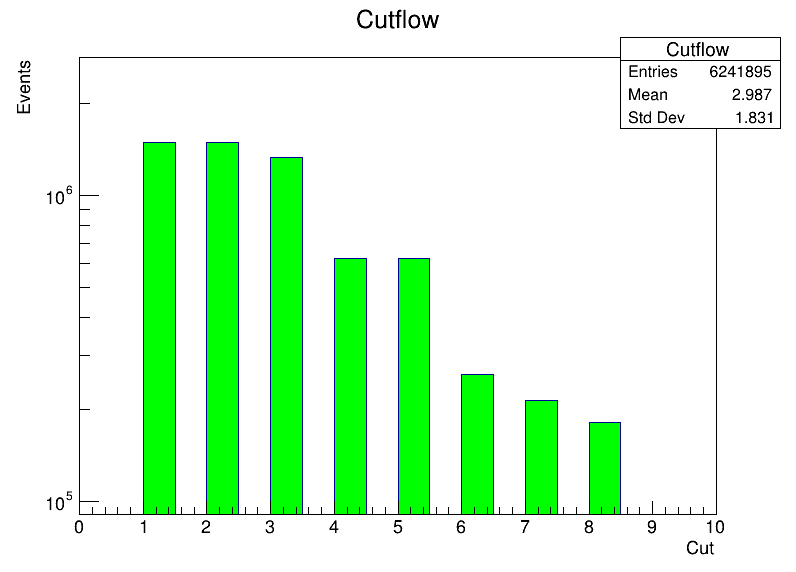

In [10]:
TCanvas *canvas1 = new TCanvas("Canvas","",800,600);
MC_cutflow->SetFillColor(03);
MC_cutflow->Draw("");
canvas1->SetLogy();
canvas1->Draw();

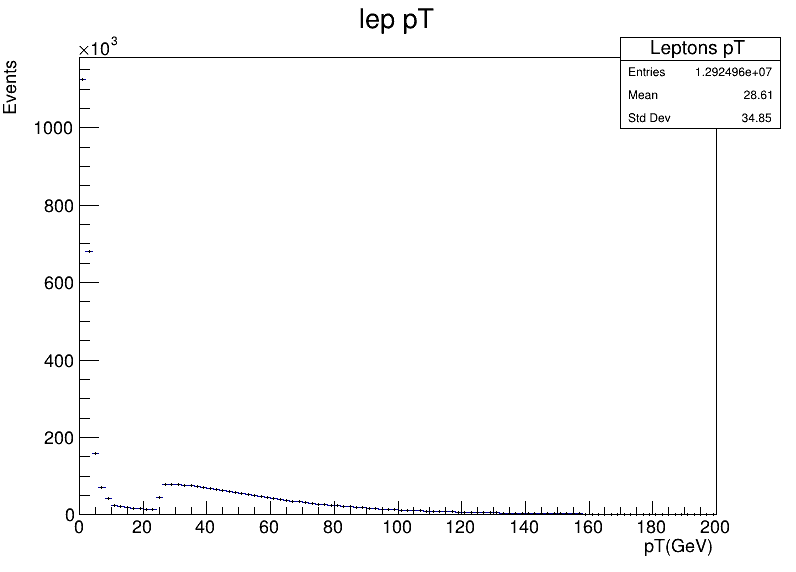

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas2


In [44]:
TCanvas *canvas2 = new TCanvas("Canvas2","2",800,600);
MC_hist_lep_pt->SetMarkerStyle(06);
MC_hist_lep_pt->SetMarkerSize(0.6);
MC_hist_lep_pt->Draw();
//hist_lep_pt->Draw("same");
canvas2->Draw();

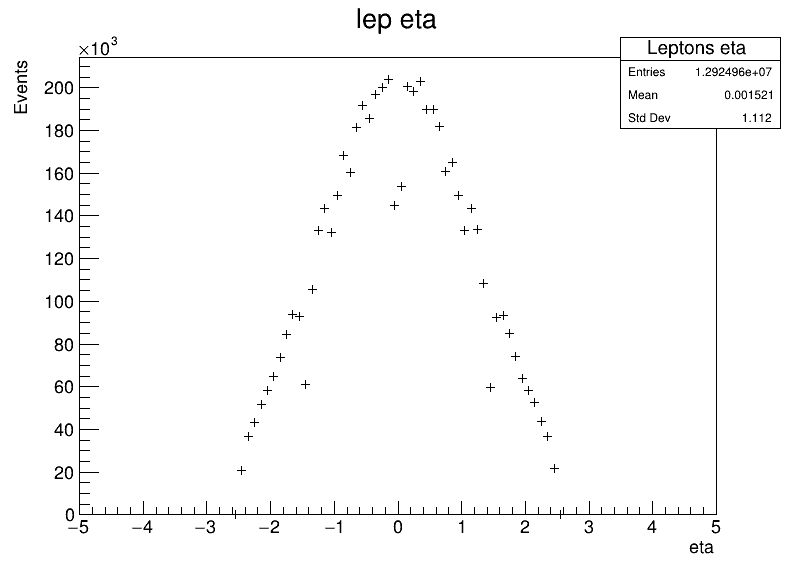

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas3


In [45]:
TCanvas *canvas3 = new TCanvas("Canvas3","3",800,600);
MC_hist_lep_eta->SetMarkerStyle(02);
MC_hist_lep_eta->Draw();
//hist_lep_eta->SetMarkerStyle(08);
//hist_lep_eta->Draw("same");
canvas3->Draw();

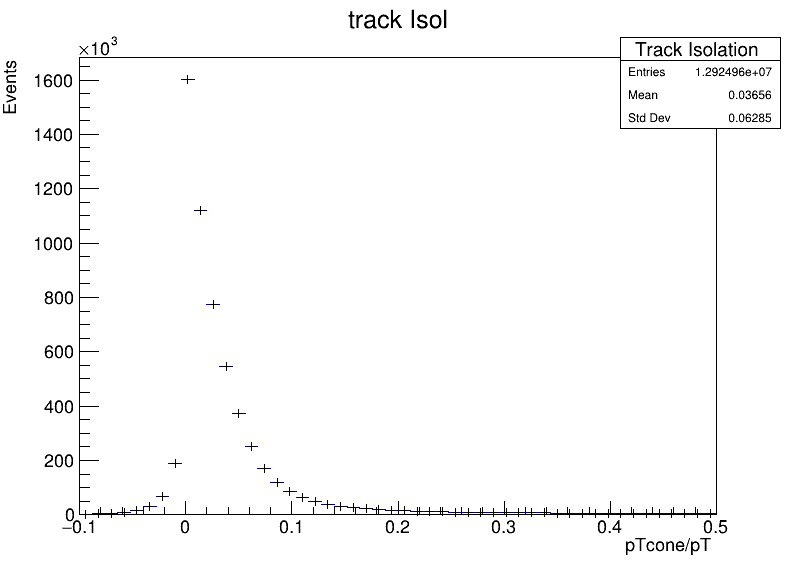

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas4


In [46]:
TCanvas *canvas4 = new TCanvas("Canvas4","4",800,600);
MC_hist_track_isol->SetMarkerStyle(02);
MC_hist_track_isol->Draw();
//hist_track_isol->SetMarkerStyle(02);
//hist_track_isol->Draw("same");
canvas4->Draw();

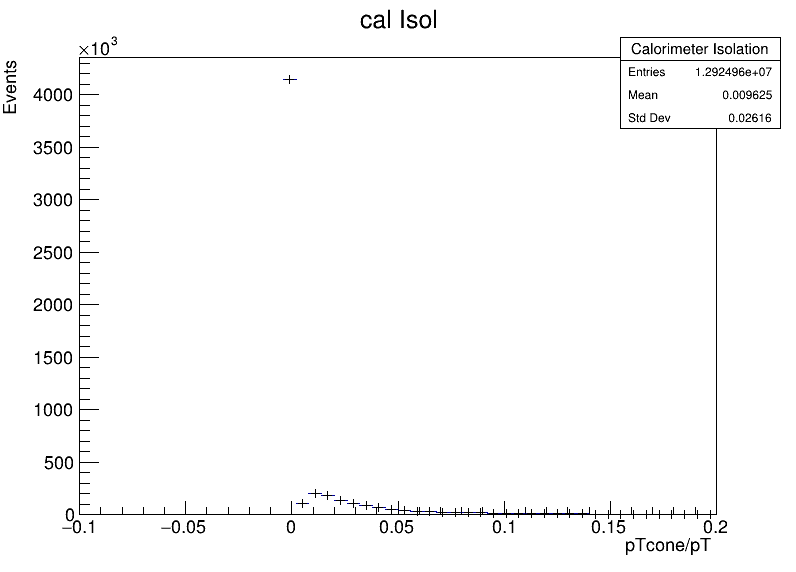

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas5


In [47]:
TCanvas *canvas5 = new TCanvas("Canvas5","5",800,600);
MC_hist_cal_isol->SetMarkerStyle(02);
MC_hist_cal_isol->Draw();
//hist_cal_isol->SetMarkerStyle(02);
//hist_cal_isol->Draw("same");
canvas5->Draw();

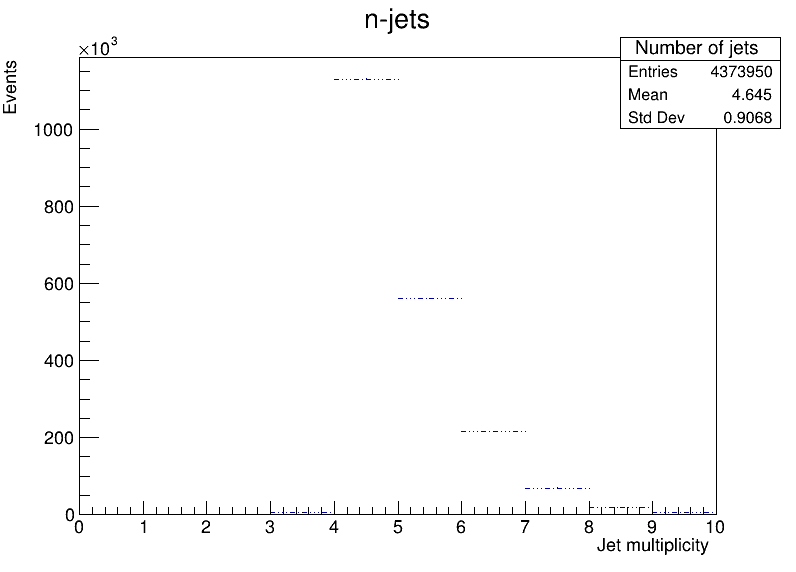

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas6


In [48]:
TCanvas *canvas6 = new TCanvas("Canvas6","6",800,600);
MC_hist_njets->SetLineStyle(06);
MC_hist_njets->SetFillColor(kRed);
MC_hist_njets->Draw("");
//hist_njets->SetMarkerStyle(05);
//hist_njets->SetMarkerColor(kBlue);
//hist_njets->Draw("same");
canvas6->Draw();

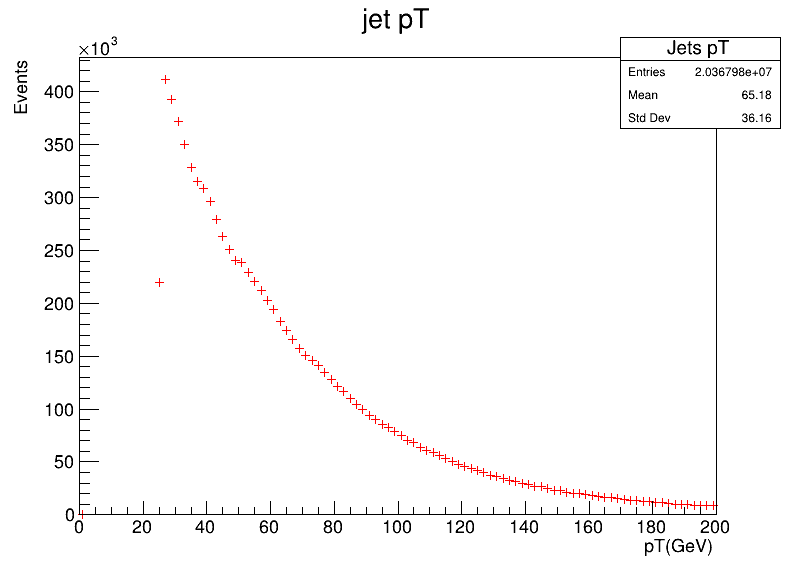

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas7


In [49]:
TCanvas *canvas7 = new TCanvas("Canvas7","7",800,600);
MC_hist_jet_pt->SetMarkerStyle(02);
MC_hist_jet_pt->SetMarkerColor(kRed);
MC_hist_jet_pt->Draw();
//hist_jet_pt->SetMarkerStyle(03);
//hist_jet_pt->SetMarkerColor(kBlue);
//hist_jet_pt->Draw("same");
canvas7->Draw();

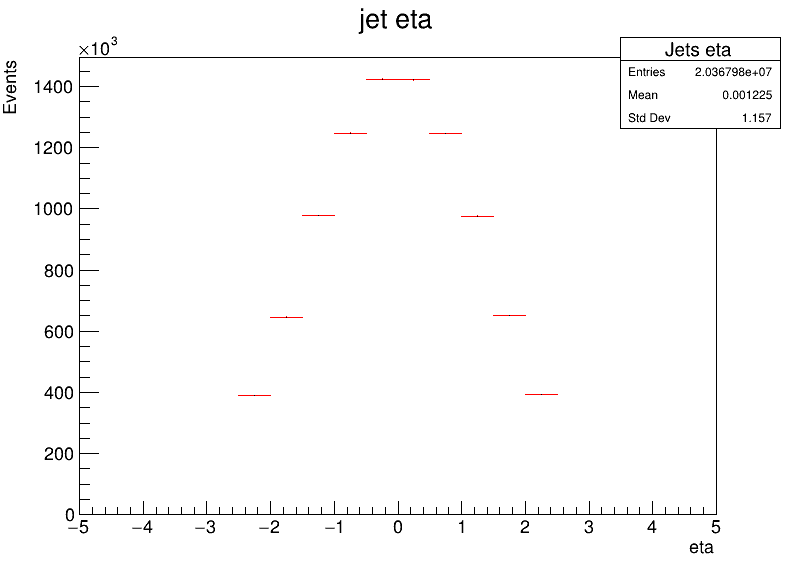

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas8


In [50]:
TCanvas *canvas8 = new TCanvas("Canvas8","8",800,600);
MC_hist_jet_eta->SetLineStyle(01);
MC_hist_jet_eta->SetLineColor(kRed);
MC_hist_jet_eta->Draw();
//hist_jet_eta->SetLineStyle(01);
//hist_jet_eta->SetLineColor(kRed);
//hist_jet_eta->Draw();
canvas8->Draw();

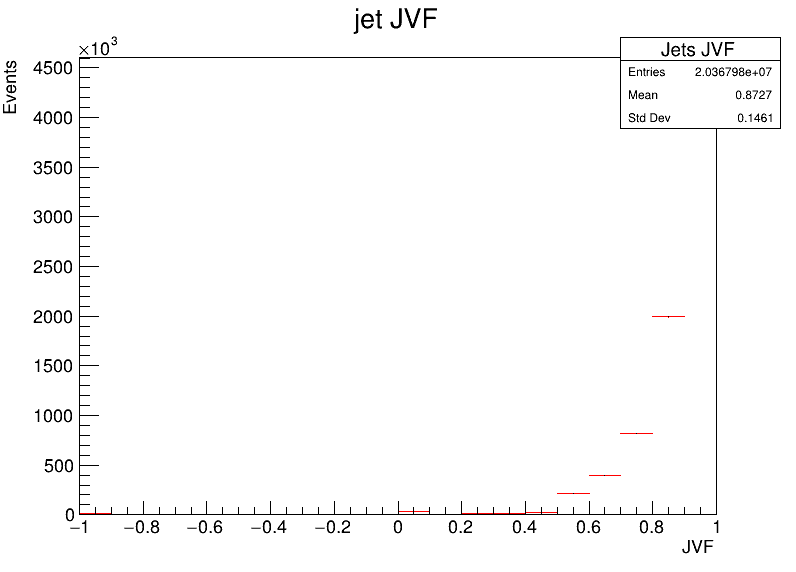

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas9


In [51]:
TCanvas *canvas9 = new TCanvas("Canvas9","9",800,600);
MC_hist_jet_jvf->SetLineColor(kRed);
MC_hist_jet_jvf->Draw();
//hist_jet_jvf->SetLineColor(kBlue);
//hist_jet_jvf->Draw("same");
canvas9->Draw();

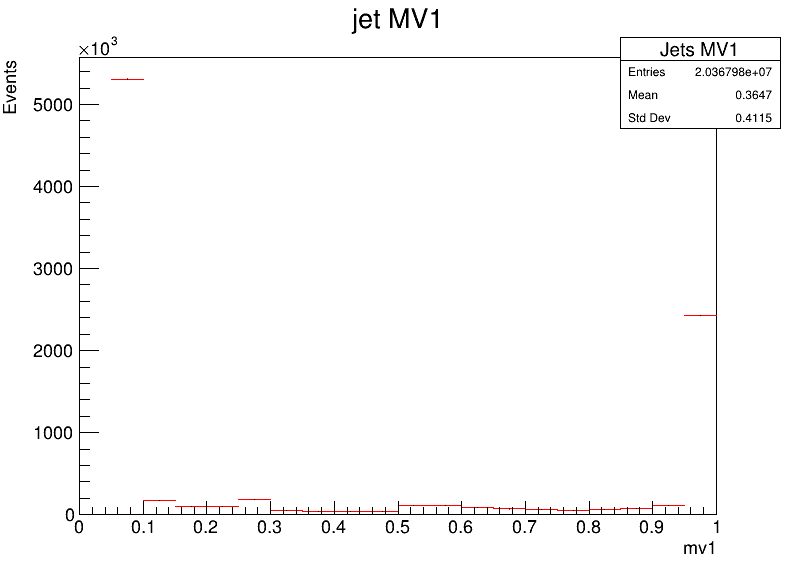

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas10


In [52]:
TCanvas *canvas10 = new TCanvas("Canvas10","10",800,600);
MC_hist_jet_mv1->SetLineColor(kRed);
MC_hist_jet_mv1->Draw();
//hist_jet_mv1->SetLineColor(kBlue);
//hist_jet_mv1->Draw("same");
canvas10->Draw();

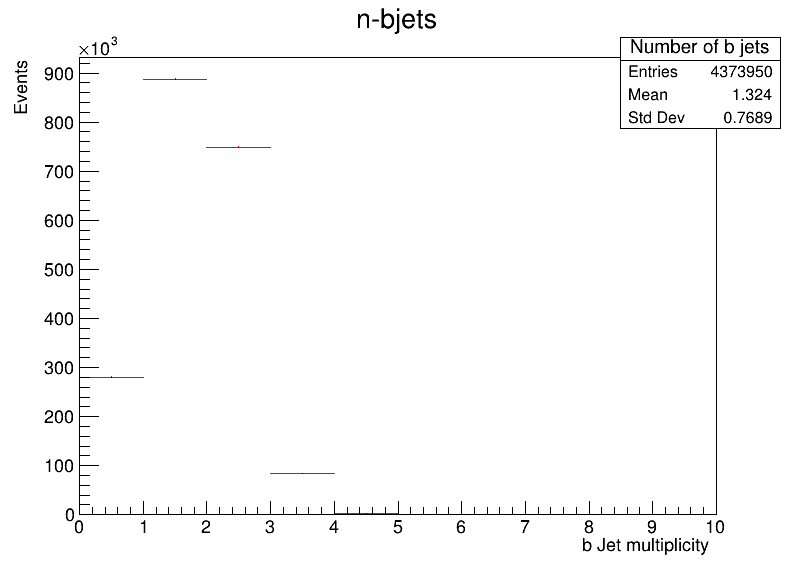

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas11


In [53]:
TCanvas *canvas11 = new TCanvas("Canvas11","11",800,600);
MC_hist_nbjets->SetLineColor(kRed);
MC_hist_nbjets->Draw();
//hist_nbjets->SetLineColor(kRed);
//hist_nbjets->Draw("same");
canvas11->Draw();

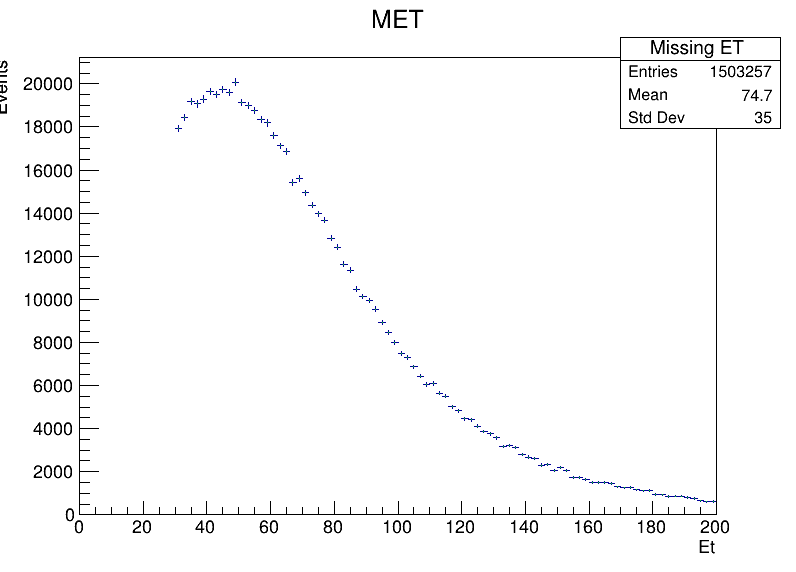

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas12


In [54]:
TCanvas *canvas12 = new TCanvas("Canvas12","12",800,600);
MC_hist_MET->SetMarkerColor(kGreen);
MC_hist_MET->Draw();
//hist_MET->SetMarkerColor(09);
//hist_MET->Draw("same");
canvas12->Draw();

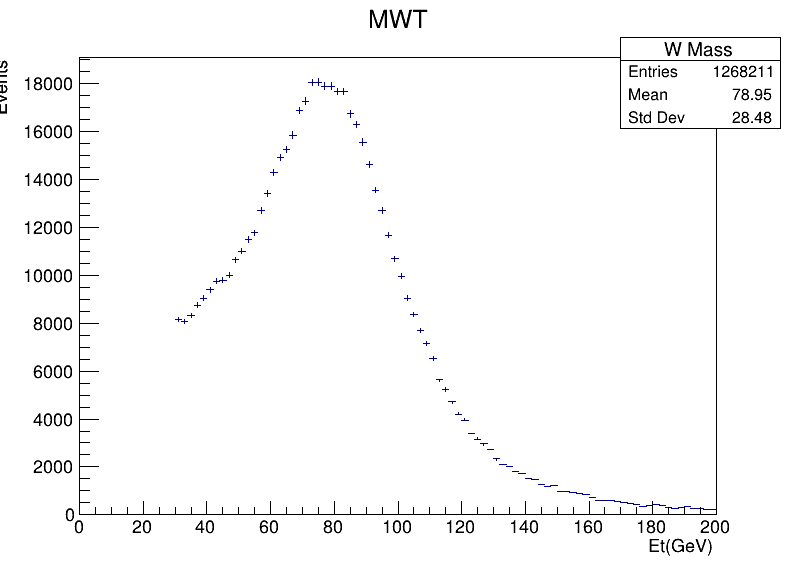

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas13


In [55]:
TCanvas *canvas13 = new TCanvas("Canvas13","13",800,600);
MC_hist_MWT->SetMarkerStyle(16);
MC_hist_MWT->SetMarkerSize(0.4);
MC_hist_MWT->Draw();
//hist_MWT->SetMarkerStyle(16);
//hist_MWT->SetMarkerSize(0.4);
//hist_MWT->Draw();
canvas13->Draw();